# NLP Classification & Sentiment Analysis

## Objective
- We will do sentiment analysis with given dataset

## Importing Modules

In [320]:
import pandas as pd
pd.set_option("display.max_columns", 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from nltk.stem import LancasterStemmer

from nltk.stem import SnowballStemmer

from nltk.stem import PorterStemmer


from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

from datetime import datetime
from PIL import Image

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.simplefilter('ignore')

In [294]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yskaraman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [295]:
df = pd.read_csv("restaurant.csv")

# EDA - Exploratory Data Analysis

In [296]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [297]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2065,2525126,XsUQlQxdkgeGLqaTTTXK2w,PyItxzr83FRB3h5Plws3EQ,RESDUcs7fIiihp38-d6_6g,5,1,1,1,Hundreds of years ago the Romans would throw t...,2016-12-07 09:39:53
8046,2998869,7bPJYTOSqi0Bqbo5wT00-A,aZ3qqx-8jw1vpuAMWbzknQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,So much improvement since the first time I wen...,2019-11-10 00:23:19
7927,2986155,GDnWFBG-XPp2pIKbk2NhLA,nUxOyRUneVuCQUa3JP_bHg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,I asked if there was a military discount and w...,2019-06-09 01:54:27
6538,2867684,XQxGZGfv-3GqWoGCbcS8dw,th7I6RJ9ttXzC34cMfjn8w,RESDUcs7fIiihp38-d6_6g,5,15,12,16,This is the fanciest buffet I have been to. \n...,2017-09-06 20:50:54
257,2388750,VaT-UnrWc1AAU-VwvJYtQQ,dnnW540hi7adaZVA6zIp_Q,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Hands down the best buffet in Vegas. Great qua...,2015-05-13 08:38:33


In [298]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [300]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Data Understanding and Data Visualization

In [301]:
df.stars.value_counts(normalize = True)

5    0.407699
4    0.253048
3    0.149851
1    0.101373
2    0.088029
Name: stars, dtype: float64

<AxesSubplot:xlabel='stars', ylabel='count'>

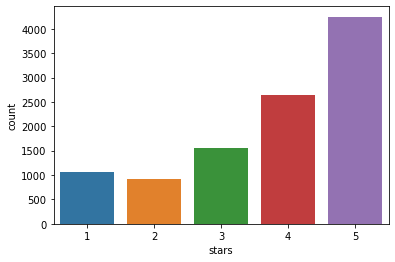

In [302]:
sns.countplot(df.stars)

## Feature Engineering

In [303]:
from langdetect import detect

df["lang"] = df["text"].apply(lambda x: detect(x))

In [304]:
df["lang"].value_counts()

en       10373
es          10
ja           8
zh-cn        7
de           4
fr           4
zh-tw        3
ko           3
da           2
sk           1
sw           1
pt           1
Name: lang, dtype: int64

In [305]:
# We will remove non-English comments
df = df[df.lang == "en"]

In [306]:
df.sample(15)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang
7729,2969216,5mmTER2WWuTOCUSLFra1ZQ,xgCNxgoOBYUGOqZ_N-nbSA,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Love this place, every time I visit Vegas this...",2017-03-07 01:15:54,en
10276,3209609,7p6Xd4aa-pMN-jty8_LiPw,aZ3qqx-8jw1vpuAMWbzknQ,RESDUcs7fIiihp38-d6_6g,1,0,0,1,Extremely over hyped. I was so disappointed. T...,2014-02-25 19:47:10,en
7468,2947292,wpIT2_ugcXI6MG7B-EtwPQ,GrG9RjzmTXiVXsA81d_wYA,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Hands down, the best buffet in LV IMO. \n\nWe ...",2015-07-15 02:17:35,en
6769,2887688,HyUOTUqdy6z-SmG2C6Kr1w,ibT8gK1Rc1CNedRlfP5jMw,RESDUcs7fIiihp38-d6_6g,4,2,0,1,The Bacchanal Buffet is the best buffet on the...,2016-10-25 05:54:42,en
3461,2631994,QbNJ28CysA08UmLzuhEY7A,XT-I0j3x7zgVap7KDf3C2g,RESDUcs7fIiihp38-d6_6g,3,0,1,0,Best buffet in Vegas?? Hmm. I don't know abo...,2017-06-12 19:38:36,en
7593,2958094,Y9mqcBRQZ56h3tCJ57JliQ,iSULc_8BD9uyIXl0sprpVw,RESDUcs7fIiihp38-d6_6g,5,1,0,0,We've been to Vegas many times and finally dec...,2015-03-16 21:12:46,en
6652,2876943,jWNf6xrvWG-gpRuEUXGsbg,19FLqyu1rhuvTDAJ9QKQaQ,RESDUcs7fIiihp38-d6_6g,3,1,0,0,Went to Bacchanal the day after going to the W...,2013-04-10 07:45:38,en
9913,3175540,bFK3lBWT4W22uKKI3890Rg,oEWrtHXsOD7mUQQ714dFQQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"This is the best. The food selection, tastes ...",2019-05-10 15:38:38,en
10049,3188818,N-YvIkPf-WMfLKHyb6rnYw,kon9fkee771ovY122yzq7w,RESDUcs7fIiihp38-d6_6g,5,2,3,1,"Bacchanal is pricey, but it is sooo worth it! ...",2017-03-15 21:00:20,en
3388,2626252,L81W-IryzosNZVr_vbU9IQ,oJIpsGMW_wEbI5cq4KY-zw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I've been to many fancy buffets in my lifetime...,2018-05-12 18:42:38,en


In [307]:
# We labeled 4 and 5 stars as positive, 3 stars as neutral, 1 and 2 stars as negative

df.loc[df["stars"] == 3, "sentiment"] = "neutral"
df.loc[df["stars"] > 3, "sentiment"] = "positive"
df.loc[df["stars"] < 3, "sentiment"] = "negative"


# OR
# df["sentiment"] = np.where(((df.stars == 5) | (df.stars == 4)), 0, np.where(df.stars == 3, 1, 2))

Text(0.5, 1.0, 'Sentiment Pie Chart')

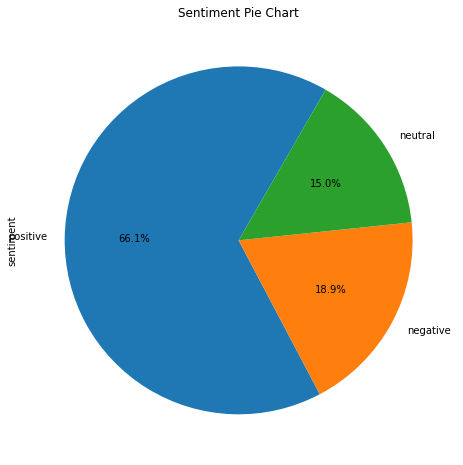

In [308]:
plt.figure(figsize=(8, 8))
explode=(0.1,0.05,0.05)
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Sentiment Pie Chart')

<AxesSubplot:xlabel='year', ylabel='stars'>

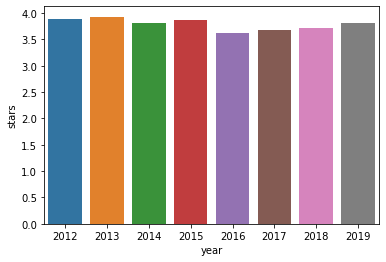

In [309]:
df["date"] = pd.to_datetime(df.date)
df["year"] = df.date.dt.year

df_temp = pd.DataFrame(df.groupby("year")["stars"].mean())

sns.barplot(df_temp.index, df_temp.stars)

In [310]:
stop_words = list(stopwords.words("english"))

df["text_wo_stopwords"] = df["text"].apply(lambda x: word_tokenize(x.lower())) 
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang,sentiment,year,text_wo_stopwords
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive,2012,"[after, getting, food, poisoning, at, the, pal..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive,2014,"[``, a, feast, worthy, of, gods, '', baccarnal..."
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive,2015,"[the, crab, legs, are, better, than, the, ones..."
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative,2016,"[not, worth, it, !, too, salty, food, and, exp..."
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive,2015,"[i, would, give, this, infinite, stars, if, i,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,en,positive,2019,"[best, buffet, ever, !, irma, was, great, ,, s..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,en,positive,2019,"[hollllllyyyy, moleyyyy, !, this, buffet, was,..."
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,en,positive,2019,"[the, selection, is, amazing, and, all, the, f..."
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,en,positive,2019,"[one, of, the, best, buffets, i, 've, had, in,..."


In [311]:
df["text_wo_stopwords"] = df["text_wo_stopwords"].apply(lambda x: [word for word in x if word not in stop_words])
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang,sentiment,year,text_wo_stopwords
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive,2012,"[getting, food, poisoning, palms, hotel, ,, sc..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive,2014,"[``, feast, worthy, gods, '', baccarnal, buffe..."
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive,2015,"[crab, legs, better, ones, wicked, spoon, huge..."
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative,2016,"[worth, !, salty, food, expensive, !, furst, k..."
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive,2015,"[would, give, infinite, stars, could, ., famil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,en,positive,2019,"[best, buffet, ever, !, irma, great, ,, served..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,en,positive,2019,"[hollllllyyyy, moleyyyy, !, buffet, one, books..."
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,en,positive,2019,"[selection, amazing, food, excellently, prepar..."
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,en,positive,2019,"[one, best, buffets, 've, vegas, ., visit, unf..."


In [312]:
df["text_wo_stopwords"] = df["text_wo_stopwords"].apply(lambda x: ' '.join(x))
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang,sentiment,year,text_wo_stopwords
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive,2012,"getting food poisoning palms hotel , scared ea..."
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive,2014,`` feast worthy gods '' baccarnal buffet caesa...
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive,2015,crab legs better ones wicked spoon huge prawns...
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative,2016,worth ! salty food expensive ! furst kast visi...
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive,2015,would give infinite stars could . family diamo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,en,positive,2019,"best buffet ever ! irma great , served us bett..."
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,en,positive,2019,hollllllyyyy moleyyyy ! buffet one books . iv ...
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,en,positive,2019,selection amazing food excellently prepared ! ...
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,en,positive,2019,one best buffets 've vegas . visit unfortunate...


In [313]:
# all sentences are converted to lowercase
df["text_wo_stopwords"] = df["text_wo_stopwords"].str.lower()

In [314]:
# punctuation marks are removed
df["text_wo_stopwords"] = df["text_wo_stopwords"].str.replace("[^\w\s]", '')

In [315]:
# numbers are removed
df["text_wo_stopwords"] = df["text_wo_stopwords"].str.replace("\d+", '')

In [316]:
# line breaks are removed (\n newline, \r enter)
df["text_wo_stopwords"] = df["text_wo_stopwords"].str.replace("\n",'').replace("\r","")

In [317]:
# this way you can write the lemmatized text in a separate column
# df["lemmatized_text"] = df["text"].apply(lambda x: WordNetLemmatizer().lemmatize(x))

# you can stem like this
# df["stemmed_text"] = df["text"].apply(lambda x: SnowballStemmer("english").stem(x))

df["polarity"] = df["text_wo_stopwords"].apply(lambda x: TextBlob(x).sentiment.polarity)

df["subjectivity"] = df["text_wo_stopwords"].apply(lambda x: TextBlob(x).sentiment.subjectivity)


df['neg'] = df['text_wo_stopwords'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['neg'])
df['neu'] = df['text_wo_stopwords'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['neu'])
df['pos'] = df['text_wo_stopwords'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['pos'])
df['compound'] = df['text_wo_stopwords'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [318]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang,sentiment,year,text_wo_stopwords,polarity,subjectivity,neg,neu,pos,compound
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive,2012,getting food poisoning palms hotel scared eat...,0.348197,0.611273,0.129,0.532,0.339,0.9756
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive,2014,feast worthy gods baccarnal buffet caesar pa...,0.222532,0.538945,0.068,0.676,0.256,0.9987
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive,2015,crab legs better ones wicked spoon huge prawns...,-0.134722,0.731944,0.180,0.624,0.196,0.1027
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative,2016,worth salty food expensive furst kast visit ...,-0.100000,0.400000,0.000,0.787,0.213,0.2263
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive,2015,would give infinite stars could family diamon...,0.362500,0.725000,0.000,0.725,0.275,0.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,en,positive,2019,best buffet ever irma great served us better...,0.766667,0.516667,0.000,0.385,0.615,0.9042
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,en,positive,2019,hollllllyyyy moleyyyy buffet one books iv ne...,0.274074,0.574074,0.049,0.595,0.357,0.9087
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,en,positive,2019,selection amazing food excellently prepared e...,0.480000,0.630000,0.000,0.348,0.652,0.9565
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,en,positive,2019,one best buffets ve vegas visit unfortunately...,0.208333,0.475000,0.157,0.523,0.320,0.6808


In [251]:
df["sentiment"] = df["sentiment"].map({"positive": 0, "neutral": 1, "negative": 2})

In [252]:
x = df.text_wo_stopwords

y = df.sentiment

print(x.shape, y.shape) 

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1) # size belirlemedik % 20 olarak kendi ayarladıxx

(10374,) (10374,)


In [253]:
vect = CountVectorizer(lowercase = True, stop_words = "english")

x_train_dtm = vect.fit_transform(x_train) # train olduğu için fit_transform

x_test_dtm = vect.transform(x_test)

In [254]:
tf = pd.DataFrame(x_train_dtm.toarray(),columns = vect.get_feature_names())
tf.head()

,__,___,____,_____,__________________________,____________________________,_really_,_that_,aa,aaaah,aaaahhh,aaaawesome,aaahhh,aaammmaaazzingggg,aahs,aalty,aamazing,aawwsm,aback,abalone,abandoned,abating,abc,abductor,abide,abiding,ability,abit,able,aboard,aborted,abound,aboveaverage,abruptly,absent,absinthe,absofreakinlutely,absolute,absolutely,absorbed,absurd,absurdly,abt,abuelita,abundance,abundant,abuse,abused,abut,abysmal,...,zigzag,zigzagging,zigzags,zillion,zing,zip,ziplock,ziti,zitis,zone,zones,zoo,zoomed,zorro,zucchini,étouffée,一点也不好吃,不用来吃了,中国游客别去chinese,作為一個老吃客我姑且給他兩顆星作為鼓勵和安慰,叉燒包,叉燒肉,好难吃超难吃东西不新鲜再也不来吃了大家千万不要来吃,如果你真希望嘗試滿足海鮮自助餐建議試一下位於加州傑克遜的農場自助餐禮拜五至禮拜一全天塊一個人龍蝦帝王蟹應有盡有,很多人排隊要有排隊的準備,排隊給我留下的印象最深,是橘黃的而不是最好的那種紅的,有帝王蟹,服务很好价格也实惠,服务很好价格也实惠好吃,杭州炒飯,椒鹽魚片,沒有帶子和石頭蟹鉗,河粉一塌糊塗跟周圍的亞洲款菜式一樣只能滿足於這輩子沒吃過河粉的人,炸春捲,烤鴨,燒麥,甜品也很多巧克力慕斯浓郁极了,皮蛋瘦肉粥,第一次去沒有傳說中那麼神奇,羊排一般太熟沒有水分而且不夠熱,蒙古牛肉,蝦餃,裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間,还要至少拍一个小时队,这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠,食材不新鲜,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
MNB = MultinomialNB()
KNC = KNeighborsClassifier()
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()

algo_list = [MNB, KNC, LR, DTC, RFC, GBC]
algo_names = ["Multinomial NB", "K Neighbors Classifier", "Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier"]

In [256]:
def tokenize_test(vect, i):
    print("Classifier Name: ", algo_names[i])
    print("\n")
    x_train_dtm = vect.fit_transform(x_train)
    print("Features: ", x_train_dtm.shape[1])
    
    x_test_dtm = vect.transform(x_test)
    
    algo_list[i].fit(x_train_dtm, y_train)
    
    y_pred_class = algo_list[i].predict(x_test_dtm)
    
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_class))  
    print("\n")

In [257]:
vect = CountVectorizer(ngram_range=(1,2), min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Classifier Name:  Multinomial NB


Features:  70540
Accuracy:  0.7902852737085582
Confusion Matrix: 
 [[1609   13   39]
 [ 250   80   92]
 [ 104   46  361]]


Classifier Name:  K Neighbors Classifier


Features:  70540
Accuracy:  0.6491904394757132
Confusion Matrix: 
 [[1600   22   39]
 [ 356   31   35]
 [ 426   32   53]]


Classifier Name:  Logistic Regression


Features:  70540
Accuracy:  0.80763299922899
Confusion Matrix: 
 [[1577   54   30]
 [ 155  160  107]
 [  70   83  358]]


Classifier Name:  Decision Tree Classifier


Features:  70540
Accuracy:  0.6649961449498843
Confusion Matrix: 
 [[1384  132  145]
 [ 203  103  116]
 [ 170  103  238]]


Classifier Name:  Random Forest Classifier


Features:  70540
Accuracy:  0.6989205859676175
Confusion Matrix: 
 [[1658    0    3]
 [ 402    3   17]
 [ 357    2  152]]


Classifier Name:  Gradient Boosting Classifier


Features:  70540
Accuracy:  0.7459521973785659
Confusion Matrix: 
 [[1630   11   20]
 [ 311   61   50]
 [ 228   39  244]]




In [103]:
vect = CountVectorizer(ngram_range=(1,2), min_df = 1)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  282562
Accuracy:  0.7259059367771781
Confusion Matrix: 
 [[1714    2    3]
 [ 356    8   29]
 [ 318    3  161]]


Features:  282562
Accuracy:  0.6761757902852737
Confusion Matrix: 
 [[1661   38   20]
 [ 339   33   21]
 [ 383   39   60]]


Features:  282562
Accuracy:  0.8184271395528142
Confusion Matrix: 
 [[1625   64   30]
 [ 153  135  105]
 [  58   61  363]]


Features:  282562
Accuracy:  0.6854279105628374
Confusion Matrix: 
 [[1444  132  143]
 [ 175  115  103]
 [ 172   91  219]]


Features:  282562
Accuracy:  0.6973785659213569
Confusion Matrix: 
 [[1714    1    4]
 [ 380    4    9]
 [ 390    1   91]]


Features:  282562
Accuracy:  0.7783346183500386
Confusion Matrix: 
 [[1676   15   28]
 [ 250   80   63]
 [ 159   60  263]]




In [104]:
vect = CountVectorizer(min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  10049
Accuracy:  0.7960678488820354
Confusion Matrix: 
 [[1567   80   72]
 [ 131  167   95]
 [  42  109  331]]


Features:  10049
Accuracy:  0.6750192752505783
Confusion Matrix: 
 [[1638   55   26]
 [ 313   48   32]
 [ 369   48   65]]


Features:  10049
Accuracy:  0.7976098689282961
Confusion Matrix: 
 [[1572   96   51]
 [ 121  160  112]
 [  51   94  337]]


Features:  10049
Accuracy:  0.6561295296838859
Confusion Matrix: 
 [[1393  174  152]
 [ 195   89  109]
 [ 154  108  220]]


Features:  10049
Accuracy:  0.7151117964533539
Confusion Matrix: 
 [[1716    1    2]
 [ 362    5   26]
 [ 346    2  134]]


Features:  10049
Accuracy:  0.7706245181187356
Confusion Matrix: 
 [[1672   22   25]
 [ 252   76   65]
 [ 173   58  251]]




In [105]:
vect = CountVectorizer(min_df = 1)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  26468
Accuracy:  0.7879722436391673
Confusion Matrix: 
 [[1676    9   34]
 [ 248   62   83]
 [ 128   48  306]]


Features:  26468
Accuracy:  0.6784888203546646
Confusion Matrix: 
 [[1644   50   25]
 [ 312   46   35]
 [ 365   47   70]]


Features:  26468
Accuracy:  0.7945258288357748
Confusion Matrix: 
 [[1574   94   51]
 [ 124  151  118]
 [  60   86  336]]


Features:  26468
Accuracy:  0.6665381649961449
Confusion Matrix: 
 [[1411  166  142]
 [ 199   97   97]
 [ 152  109  221]]


Features:  26468
Accuracy:  0.700077101002313
Confusion Matrix: 
 [[1715    1    3]
 [ 377    3   13]
 [ 381    3   98]]


Features:  26468
Accuracy:  0.769082498072475
Confusion Matrix: 
 [[1668   23   28]
 [ 248   80   65]
 [ 171   64  247]]




In [106]:
# En iyisi bu olduğu için bunun üzerinden doğruluk oranımızı yükseltmeye çalışıyoruz
vect = CountVectorizer(ngram_range=(1,2), min_df = 2, stop_words = "english")

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  60814
Accuracy:  0.7972243639167309
Confusion Matrix: 
 [[1663   19   37]
 [ 230   72   91]
 [ 105   44  333]]


Features:  60814
Accuracy:  0.6669236700077101
Confusion Matrix: 
 [[1684   15   20]
 [ 370    9   14]
 [ 433   12   37]]


Features:  60814
Accuracy:  0.7991518889745567
Confusion Matrix: 
 [[1609   69   41]
 [ 162  131  100]
 [  72   77  333]]


Features:  60814
Accuracy:  0.6738627602158828
Confusion Matrix: 
 [[1434  141  144]
 [ 182   93  118]
 [ 162   99  221]]


Features:  60814
Accuracy:  0.7185813415574402
Confusion Matrix: 
 [[1709    1    9]
 [ 366    2   25]
 [ 327    2  153]]


Features:  60814
Accuracy:  0.7575173477255205
Confusion Matrix: 
 [[1693    8   18]
 [ 283   57   53]
 [ 220   47  215]]




In [111]:
vect = CountVectorizer(ngram_range=(1,3), min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  181382
Accuracy:  0.813030069390902
Confusion Matrix: 
 [[1680   17   22]
 [ 223   85   85]
 [  97   41  344]]


Features:  181382
Accuracy:  0.6784888203546646
Confusion Matrix: 
 [[1649   42   28]
 [ 325   37   31]
 [ 371   37   74]]


Features:  181382
Accuracy:  0.8199691595990748
Confusion Matrix: 
 [[1629   61   29]
 [ 154  138  101]
 [  56   66  360]]


Features:  181382
Accuracy:  0.6827293754818813
Confusion Matrix: 
 [[1452  128  139]
 [ 184  104  105]
 [ 174   93  215]]


Features:  181382
Accuracy:  0.7124132613723978
Confusion Matrix: 
 [[1714    1    4]
 [ 365    2   26]
 [ 350    0  132]]


Features:  181382
Accuracy:  0.7756360832690825
Confusion Matrix: 
 [[1672   15   32]
 [ 247   78   68]
 [ 163   57  262]]




In [107]:
vect = TfidfVectorizer(ngram_range=(1,2), min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  86356
Accuracy:  0.6626831148804935
Confusion Matrix: 
 [[1719    0    0]
 [ 393    0    0]
 [ 482    0    0]]


Features:  86356
Accuracy:  0.7170393215111797
Confusion Matrix: 
 [[1568   64   87]
 [ 249   61   83]
 [ 195   56  231]]


Features:  86356
Accuracy:  0.8188126445643793
Confusion Matrix: 
 [[1694   16    9]
 [ 214   89   90]
 [  99   42  341]]


Features:  86356
Accuracy:  0.6761757902852737
Confusion Matrix: 
 [[1421  162  136]
 [ 159  114  120]
 [ 162  101  219]]


Features:  86356
Accuracy:  0.7151117964533539
Confusion Matrix: 
 [[1714    2    3]
 [ 368    2   23]
 [ 341    2  139]]


Features:  86356
Accuracy:  0.7829606784888203
Confusion Matrix: 
 [[1681   14   24]
 [ 242   78   73]
 [ 153   57  272]]




In [108]:
vect = TfidfVectorizer(ngram_range=(1,2), min_df = 1)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  282562
Accuracy:  0.6626831148804935
Confusion Matrix: 
 [[1719    0    0]
 [ 393    0    0]
 [ 482    0    0]]


Features:  282562
Accuracy:  0.7154973014649191
Confusion Matrix: 
 [[1557   66   96]
 [ 244   59   90]
 [ 181   61  240]]


Features:  282562
Accuracy:  0.8188126445643793
Confusion Matrix: 
 [[1694   16    9]
 [ 218   91   84]
 [ 101   42  339]]


Features:  282562
Accuracy:  0.6572860447185813
Confusion Matrix: 
 [[1399  183  137]
 [ 166  102  125]
 [ 151  127  204]]


Features:  282562
Accuracy:  0.7008481110254433
Confusion Matrix: 
 [[1717    1    1]
 [ 373    3   17]
 [ 384    0   98]]


Features:  282562
Accuracy:  0.7802621434078643
Confusion Matrix: 
 [[1669   21   29]
 [ 229   82   82]
 [ 148   61  273]]




In [109]:
vect = TfidfVectorizer(min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  10049
Accuracy:  0.6696222050886661
Confusion Matrix: 
 [[1718    0    1]
 [ 391    0    2]
 [ 463    0   19]]


Features:  10049
Accuracy:  0.6954510408635313
Confusion Matrix: 
 [[1555   74   90]
 [ 266   53   74]
 [ 222   64  196]]


Features:  10049
Accuracy:  0.8211256746337703
Confusion Matrix: 
 [[1668   29   22]
 [ 188  107   98]
 [  72   55  355]]


Features:  10049
Accuracy:  0.6630686198920586
Confusion Matrix: 
 [[1393  172  154]
 [ 171  104  118]
 [ 162   97  223]]


Features:  10049
Accuracy:  0.7131842713955281
Confusion Matrix: 
 [[1715    1    3]
 [ 361    5   27]
 [ 351    1  130]]


Features:  10049
Accuracy:  0.7698535080956053
Confusion Matrix: 
 [[1670   24   25]
 [ 244   75   74]
 [ 170   60  252]]




In [110]:
vect = TfidfVectorizer(min_df = 1)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Features:  26468
Accuracy:  0.6626831148804935
Confusion Matrix: 
 [[1719    0    0]
 [ 393    0    0]
 [ 482    0    0]]


Features:  26468
Accuracy:  0.6927525057825752
Confusion Matrix: 
 [[1532   84  103]
 [ 259   56   78]
 [ 202   71  209]]


Features:  26468
Accuracy:  0.8199691595990748
Confusion Matrix: 
 [[1666   31   22]
 [ 189  106   98]
 [  71   56  355]]


Features:  26468
Accuracy:  0.6557440246723207
Confusion Matrix: 
 [[1380  185  154]
 [ 176  112  105]
 [ 168  105  209]]


Features:  26468
Accuracy:  0.7012336160370085
Confusion Matrix: 
 [[1718    1    0]
 [ 377    3   13]
 [ 383    1   98]]


Features:  26468
Accuracy:  0.7713955281418658
Confusion Matrix: 
 [[1669   27   23]
 [ 242   77   74]
 [ 161   66  255]]




In [125]:
# It takes a lot of time, stemmers didn't help much 
SS = SnowballStemmer("english")
PS = PorterStemmer()
LS = LancasterStemmer()

stemmer_list = [SS, PS, LS]
stemmer_names = ["Snowball Stemmer", "Porter Stemmer", "Lancaster Stemmer"]

for i in range(len(algo_list)):
    for j in range(len(stemmer_list)):
        def split_into_lemmas(text):
            text = str(text).lower()
            words = TextBlob(text).words

            return [stemmer_list[j].stem(word) for word in words]
        
        print("Stemmer Name: ", stemmer_names[j])
        print("\n")
        vect = CountVectorizer(analyzer = split_into_lemmas, min_df = 1)
        tokenize_test(vect, i)




Stemmer Name:  Snowball Stemmer


Classifier Name:  Multinomial NB


Features:  21107
Accuracy:  0.7898997686969931
Confusion Matrix: 
 [[1661   12   46]
 [ 231   75   87]
 [ 109   60  313]]


Stemmer Name:  Porter Stemmer


Classifier Name:  Multinomial NB


Features:  21259
Accuracy:  0.7875867386276022
Confusion Matrix: 
 [[1660   12   47]
 [ 234   72   87]
 [ 110   61  311]]


Stemmer Name:  Lancaster Stemmer


Classifier Name:  Multinomial NB


Features:  19033
Accuracy:  0.7883577486507325
Confusion Matrix: 
 [[1659   14   46]
 [ 227   75   91]
 [ 102   69  311]]


Stemmer Name:  Snowball Stemmer


Classifier Name:  K Neighbors Classifier


Features:  21107
Accuracy:  0.674633770239013
Confusion Matrix: 
 [[1644   56   19]
 [ 320   41   32]
 [ 369   48   65]]


Stemmer Name:  Porter Stemmer


Classifier Name:  K Neighbors Classifier


Features:  21259
Accuracy:  0.6765612952968388
Confusion Matrix: 
 [[1646   55   18]
 [ 317   45   31]
 [ 368   50   64]]


Stemmer Name:  Lancaste

In [33]:
# We anticipate that it will not be of much use for Lemmatize, and we do not do this.
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words

    return [lemma.lemmatize(word) for word in words]
    

Features:  21107
Accuracy:  0.7898997686969931
Confusion Matrix: 
 [[1661   12   46]
 [ 231   75   87]
 [ 109   60  313]]


# Creating Pipeline

- We create a model with the pipeline to give our model a sentence and understand whether it is negative or positive.

In [134]:
model = Pipeline([("vectorizer", vect), ("classifier", MNB)])
model.fit(x_train, y_train)
pred = model.predict(x_test)
confusion_matrix(pred, y_test)

array([[1651,  191,   68],
       [  30,  108,   57],
       [  38,   94,  357]], dtype=int64)

In [1]:
model.predict(["foods are horrible"])

NameError: name 'model' is not defined

In [135]:
ex = ["staff are terribe"]
if model.predict(ex) == 2:
    print("negative")
elif model.predict(ex) == 1:
    print("neutral")
else:
    print("positive")


positive


In [325]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    wc = WordCloud(background_color = "white", mask = mask, max_words = 2500, stopwords = STOPWORDS)
    wc.generate(str(text))
    wc.to_file("wc.png")
    plt.figure(figsize = (20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [327]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,lang,sentiment,year,text_wo_stopwords,polarity,subjectivity,neg,neu,pos,compound
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive,2012,getting food poisoning palms hotel scared eat...,0.348197,0.611273,0.129,0.532,0.339,0.9756
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive,2014,feast worthy gods baccarnal buffet caesar pa...,0.222532,0.538945,0.068,0.676,0.256,0.9987
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive,2015,crab legs better ones wicked spoon huge prawns...,-0.134722,0.731944,0.180,0.624,0.196,0.1027
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative,2016,worth salty food expensive furst kast visit ...,-0.100000,0.400000,0.000,0.787,0.213,0.2263
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive,2015,would give infinite stars could family diamon...,0.362500,0.725000,0.000,0.725,0.275,0.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,en,positive,2019,best buffet ever irma great served us better...,0.766667,0.516667,0.000,0.385,0.615,0.9042
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,en,positive,2019,hollllllyyyy moleyyyy buffet one books iv ne...,0.274074,0.574074,0.049,0.595,0.357,0.9087
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,en,positive,2019,selection amazing food excellently prepared e...,0.480000,0.630000,0.000,0.348,0.652,0.9565
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,en,positive,2019,one best buffets ve vegas visit unfortunately...,0.208333,0.475000,0.157,0.523,0.320,0.6808


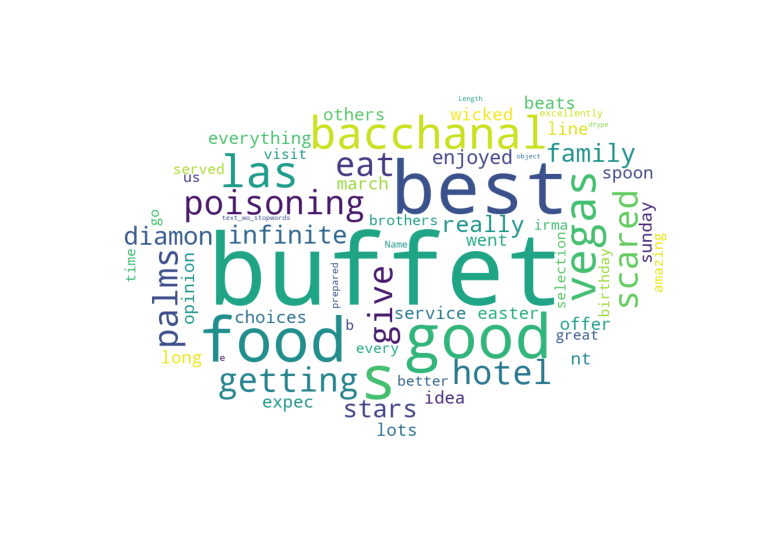

In [329]:
create_wordcloud(df[df.stars == 5].text_wo_stopwords)

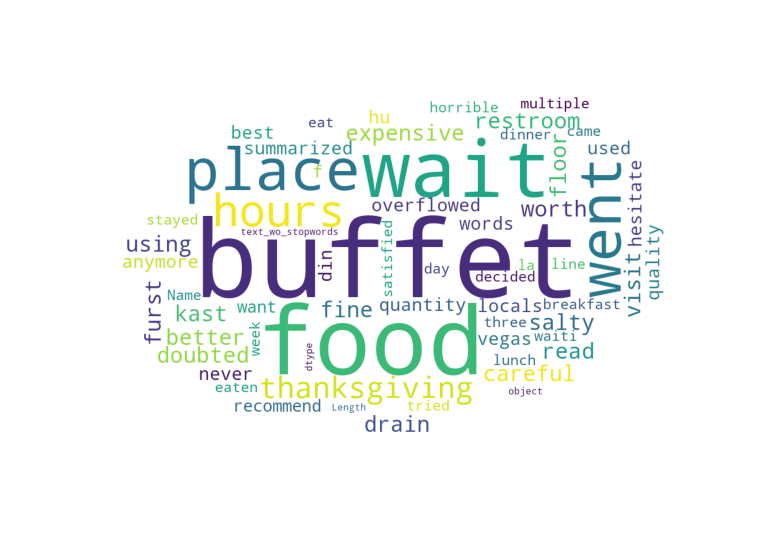

In [330]:
create_wordcloud(df[df.stars == 1].text_wo_stopwords)

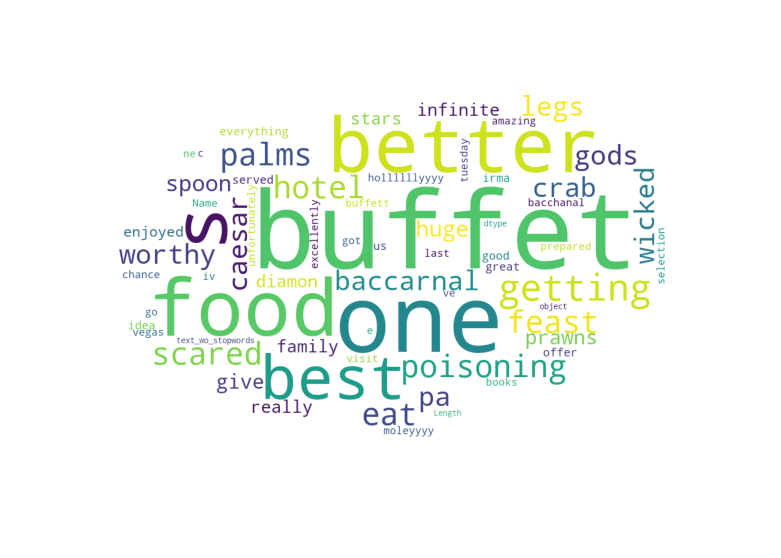

In [331]:
create_wordcloud(df[df.sentiment == "positive"].text_wo_stopwords)

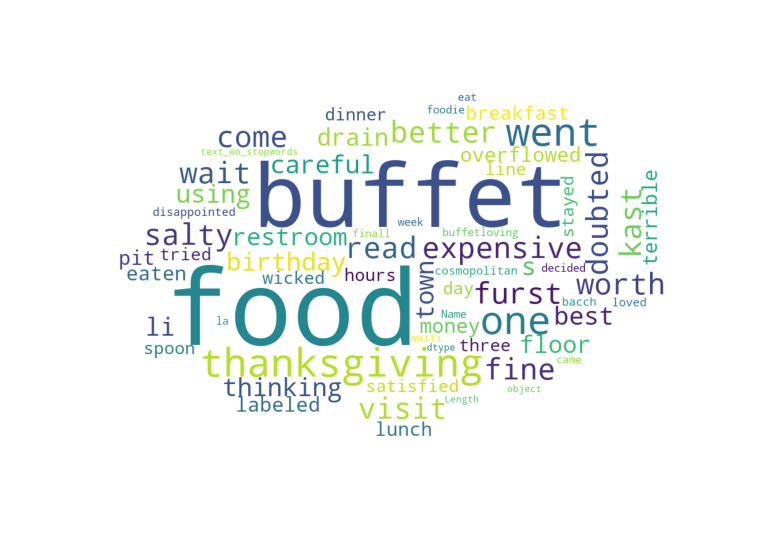

In [332]:
create_wordcloud(df[df.sentiment == "negative"].text_wo_stopwords)

- We tried many algorithms and Logistic Regression was the best with MultinomialNB. He guessed about 80% correct.
- Our aim in this project was to find out why the bad voters of Bachanal Restaurant gave bad votes and to make improvements in those aspects. It was a real life project.
- wait
- restroom
- salty
- expensive 

We've had complaints like above. So the restaurant can fix these and increase its profits

In [333]:
# CountVectorizer configurations were like this
vect = CountVectorizer(ngram_range=(1,2), min_df = 2)

for i in range(len(algo_list)):
    tokenize_test(vect, i)

Classifier Name:  Multinomial NB


Features:  70540
Accuracy:  0.7902852737085582
Confusion Matrix: 
 [[1609   13   39]
 [ 250   80   92]
 [ 104   46  361]]


Classifier Name:  K Neighbors Classifier


Features:  70540
Accuracy:  0.6491904394757132
Confusion Matrix: 
 [[1600   22   39]
 [ 356   31   35]
 [ 426   32   53]]


Classifier Name:  Logistic Regression


Features:  70540
Accuracy:  0.80763299922899
Confusion Matrix: 
 [[1577   54   30]
 [ 155  160  107]
 [  70   83  358]]


Classifier Name:  Decision Tree Classifier


Features:  70540
Accuracy:  0.6622976098689283
Confusion Matrix: 
 [[1386  133  142]
 [ 204  102  116]
 [ 174  107  230]]


Classifier Name:  Random Forest Classifier


Features:  70540
Accuracy:  0.6966075558982266
Confusion Matrix: 
 [[1657    0    4]
 [ 403    5   14]
 [ 365    1  145]]


Classifier Name:  Gradient Boosting Classifier


Features:  70540
Accuracy:  0.7447956823438705
Confusion Matrix: 
 [[1629   12   20]
 [ 311   61   50]
 [ 229   40  242]]


